In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import silhouette_score

In [36]:
iris = pd.read_csv('Iris.csv')  # Replace with your dataset path
salary = pd.read_csv('Salary_dataset.csv')  # Replace with your dataset path
clustering = pd.read_csv('data.csv')  # Replace with your dataset path

In [37]:
print(iris.head())
print(salary.head())
print(clustering.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0
            x           y  color
0  516.012706  393.014514      0
1  436.211762  408.656585      0
2  512.052601  372.022014      0
3  489.140464  401.807159      0
4  446.207986  338.516682      0


In [38]:
### PART 1: DATA LOADING AND PREPROCESSING ###

# 3. Missing Value Handling
print("Missing Values in Iris Dataset:\n", iris.isnull().sum())
print("Missing Values in Salary Dataset:\n", salary.isnull().sum())
print("Missing Values in Clustering Dataset:\n", clustering.isnull().sum())


Missing Values in Iris Dataset:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Missing Values in Salary Dataset:
 Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64
Missing Values in Clustering Dataset:
 x        0
y        0
color    0
dtype: int64


In [39]:
# Deletion (dropping rows with missing values)
iris.dropna(inplace=True)
salary.fillna(salary.mean(), inplace=True)  # Impute missing values with mean for numerical columns


In [40]:
# 4. Encoding Categorical Features (for classification task)
label_encoder = LabelEncoder()
iris['Species'] = label_encoder.fit_transform(iris['Species'])


In [41]:
# 5. Train-Test Split (80-20 split, stratified for classification)
X_iris = iris.drop('Species', axis=1)
y_iris = iris['Species']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)

In [42]:
# Independent variable (YearsExperience)
X_salary = salary[['YearsExperience']]  # Independent variable

# Dependent variable (Salary)
y_salary = salary['Salary']  # Dependent variable

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)


In [43]:
# Feature Scaling: Standardization and Normalization
scaler = StandardScaler()
X_train_cls_std = scaler.fit_transform(X_train_cls)
X_test_cls_std = scaler.transform(X_test_cls)

In [44]:
min_max_scaler = MinMaxScaler()
X_train_cls_mm = min_max_scaler.fit_transform(X_train_cls)
X_test_cls_mm = min_max_scaler.transform(X_test_cls)

In [45]:
### PART 2: FEATURE ENGINEERING ###

# 6. Feature Selection using RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cls_std, y_train_cls)
selector = SelectFromModel(rf, prefit=True)
X_train_fs = selector.transform(X_train_cls_std)
X_test_fs = selector.transform(X_test_cls_std)


In [46]:
# 7. Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_fs)
X_test_pca = pca.transform(X_test_fs)

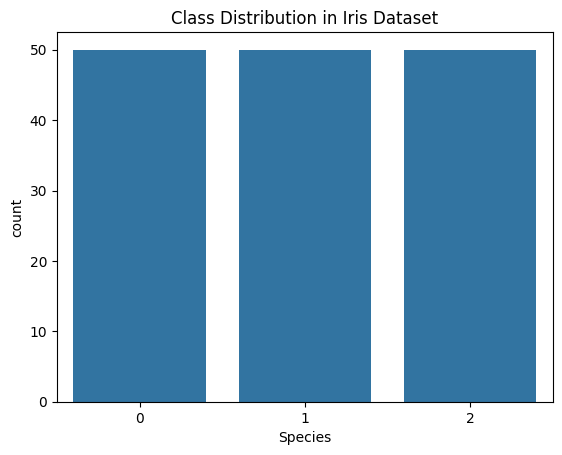

In [47]:
# 8. Class Balance Check
sns.countplot(x='Species', data=iris)
plt.title('Class Distribution in Iris Dataset')
plt.show()

In [48]:
# SMOTE (for balancing class distribution)
smote = SMOTE(random_state=42)
X_train_cls_smote, y_train_cls_smote = smote.fit_resample(X_train_cls, y_train_cls)

In [49]:
### PART 3: MODEL BUILDING ###

# 9. Classification Models
models_cls = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': SVC(kernel='linear'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

In [50]:
# Train and Evaluate Classification Models
for name, model in models_cls.items():
    model.fit(X_train_pca, y_train_cls)
    y_pred = model.predict(X_test_pca)
    print(f"{name} Accuracy: {accuracy_score(y_test_cls, y_pred):.2f}")
    print(classification_report(y_test_cls, y_pred))


Perceptron Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.78      0.70      0.74        10
           2       1.00      0.80      0.89        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

Logistic Regression Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVM (Linear) Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1

In [51]:
# 10. Regression Models
models_reg = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor()
}

In [52]:
# Train and Evaluate Regression Models
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")


Linear Regression MSE: 49830096.86, R2: 0.90
Ridge Regression MSE: 49974852.72, R2: 0.90
Lasso Regression MSE: 49830434.56, R2: 0.90
Decision Tree Regressor MSE: 101047709.83, R2: 0.80


In [53]:
# 11. Clustering Models
clustering_models = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

In [57]:
# Train and Evaluate Clustering Models
for name, model in clustering_models.items():
    model.fit(clustering[['x', 'y']])  # assuming 'x' and 'y' are the feature columns for clustering

    # Check if the model has labels_ attribute (common for models like DBSCAN, Agglomerative)
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(clustering[['x', 'y']])

    # Check if the number of unique labels is greater than 1
    if len(set(labels)) > 1:
        silhouette = silhouette_score(clustering[['x', 'y']], labels)
        print(f"{name} Silhouette Score: {silhouette:.2f}")
    else:
        print(f"{name} Silhouette Score: Cannot be computed (only 1 cluster)")



K-Means Silhouette Score: 0.61
Agglomerative Clustering Silhouette Score: 0.61
DBSCAN Silhouette Score: Cannot be computed (only 1 cluster)


In [58]:
# 12. Ensemble Models
ensemble_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Voting Classifier': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())])
}

In [59]:
# Train and Evaluate Ensemble Models
for name, model in ensemble_models.items():
    model.fit(X_train_pca, y_train_cls)
    y_pred = model.predict(X_test_pca)
    print(f"{name} Accuracy: {accuracy_score(y_test_cls, y_pred):.2f}")

Random Forest Accuracy: 1.00
Bagging Accuracy: 1.00
AdaBoost Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
Voting Classifier Accuracy: 1.00


In [60]:
### PART 4: MODEL VALIDATION & EVALUATION ###

# 13. Validation using Cross-Validation
for name, model in models_cls.items():
    scores = cross_val_score(model, X_train_pca, y_train_cls, cv=5)
    print(f"{name} Cross-validation Accuracy: {scores.mean():.2f}")

Perceptron Cross-validation Accuracy: 0.91
Logistic Regression Cross-validation Accuracy: 1.00
SVM (Linear) Cross-validation Accuracy: 1.00
K-Nearest Neighbors Cross-validation Accuracy: 1.00
Decision Tree Cross-validation Accuracy: 0.99
Gaussian Naive Bayes Cross-validation Accuracy: 1.00


In [61]:
# 14. Hyperparameter Tuning using GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train_cls)
print(f"Best Parameters for KNN: {grid_search.best_params_}")

Best Parameters for KNN: {'n_neighbors': 1}


In [62]:
# 15. Outlier Detection using Z-Score Method
from scipy import stats
z_scores = np.abs(stats.zscore(X_train_cls))
print(f"Z-Scores:\n{z_scores}")

Z-Scores:
[[1.55163971 1.72156775 0.32483982 1.34703555 1.32016847]
 [0.72984103 1.12449223 1.22612948 0.41429037 0.65186742]
 [0.03142856 1.14439475 0.55016223 0.58474127 0.25746024]
 [1.52835929 1.12449223 0.12580502 1.29021859 1.45163753]
 [0.33407397 0.40800161 1.22612948 0.13020555 0.12599118]
 [1.66105766 0.54731923 1.22612948 0.6983752  0.91480554]
 [0.45047605 0.2885865  0.77548465 0.24383948 0.12599118]
 [1.35841226 0.54731923 0.55016223 0.75519216 0.3889293 ]
 [1.40497309 2.21913069 0.0995174  1.32336182 1.44068178]
 [0.98592561 2.21913069 1.70306192 1.66426361 1.30921272]
 [0.70656062 2.09971558 0.0995174  1.60744665 1.17774366]
 [0.07798939 0.18907392 0.32483982 0.41429037 0.3889293 ]
 [0.34105809 1.00507713 2.35274155 0.15387928 0.268416  ]
 [0.17809518 0.04975629 0.77548465 0.18702251 0.268416  ]
 [0.40391521 0.04975629 1.00080706 0.13020555 0.00547788]
 [1.06275098 1.36332244 0.35112743 1.23340162 1.32016847]
 [1.29555514 0.88566202 1.70306192 1.29021859 1.18869941]
 [0.

In [63]:
# 16. Evaluation Metrics (Accuracy, Precision, Recall, etc.)
y_pred = models_cls['Logistic Regression'].predict(X_test_pca)
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred))
print("Classification Report:\n", classification_report(y_test_cls, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



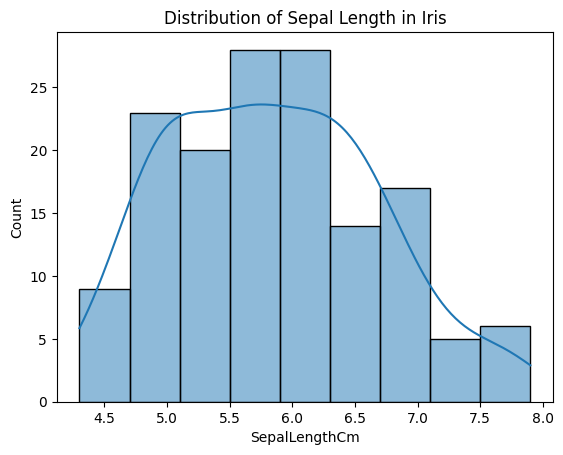

In [64]:
### PART 5: VISUALIZATION ###

# 17. EDA Plots: Histograms and Scatter Plots
sns.histplot(iris['SepalLengthCm'], kde=True)
plt.title('Distribution of Sepal Length in Iris')
plt.show()

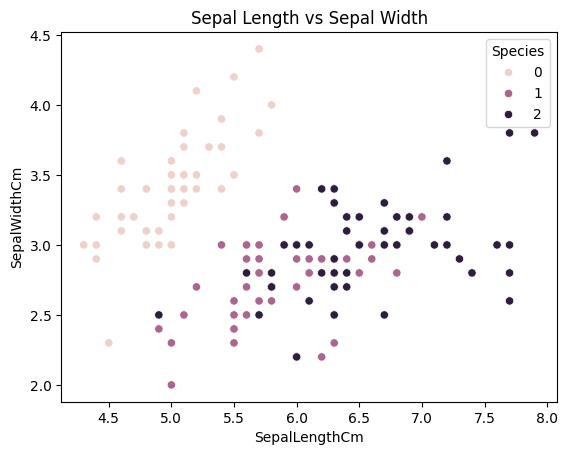

In [65]:
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'])
plt.title('Sepal Length vs Sepal Width')
plt.show()

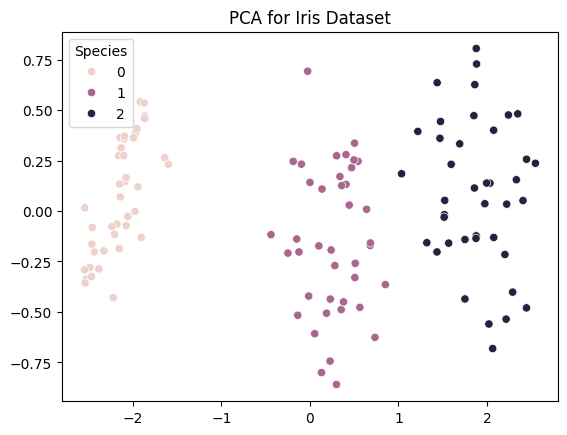

In [66]:
# 18. Dimensionality Reduction Visualization
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train_cls)
plt.title('PCA for Iris Dataset')
plt.show()

In [67]:
### PART 6: PIPELINE CREATION ###

# Create Pipeline for Classification
pipeline_cls = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])
pipeline_cls.fit(X_train_cls, y_train_cls)
print(f"Pipeline Accuracy: {pipeline_cls.score(X_test_cls, y_test_cls):.2f}")

Pipeline Accuracy: 1.00


In [74]:
# Store accuracy for classification models
accuracy_scores_cls = {}
for name, model in models_cls.items():
    model.fit(X_train_pca, y_train_cls)
    y_pred = model.predict(X_test_pca)
    accuracy_scores_cls[name] = accuracy_score(y_test_cls, y_pred)

In [76]:
# Store R2 for regression models
r2_scores_reg = {}
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred_reg = model.predict(X_test_reg)
    r2_scores_reg[name] = r2_score(y_test_reg, y_pred_reg)

In [80]:
from sklearn.metrics import silhouette_score

# Store silhouette score for clustering models
silhouette_scores_clust = {}
for name, model in clustering_models.items():
    model.fit(clustering[['x', 'y']])  # assuming 'x' and 'y' are the feature columns for clustering
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(clustering[['x', 'y']])

    # Check if there are more than 1 cluster (to calculate silhouette score)
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(clustering[['x', 'y']], labels)
        silhouette_scores_clust[name] = silhouette
    else:
        silhouette_scores_clust[name] = None  # If only 1 cluster, store None

# Print silhouette scores (some might be None)
print("Silhouette Scores for Clustering Models:")
for model_name, score in silhouette_scores_clust.items():
    print(f"{model_name}: {score}")



Silhouette Scores for Clustering Models:
K-Means: 0.6110715619378336
Agglomerative Clustering: 0.6110715619378336
DBSCAN: None


In [82]:
# 2. Plotting the Model Performance Comparison

# Prepare data for plotting
metrics = {
    'Classification Accuracy': accuracy_scores_cls,
    'Regression R2': r2_scores_reg,
    'Clustering Silhouette': silhouette_scores_clust
}

In [83]:
# Create a DataFrame for the comparison
metrics_df = pd.DataFrame(metrics)

In [84]:
# Plotting the performance comparison
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

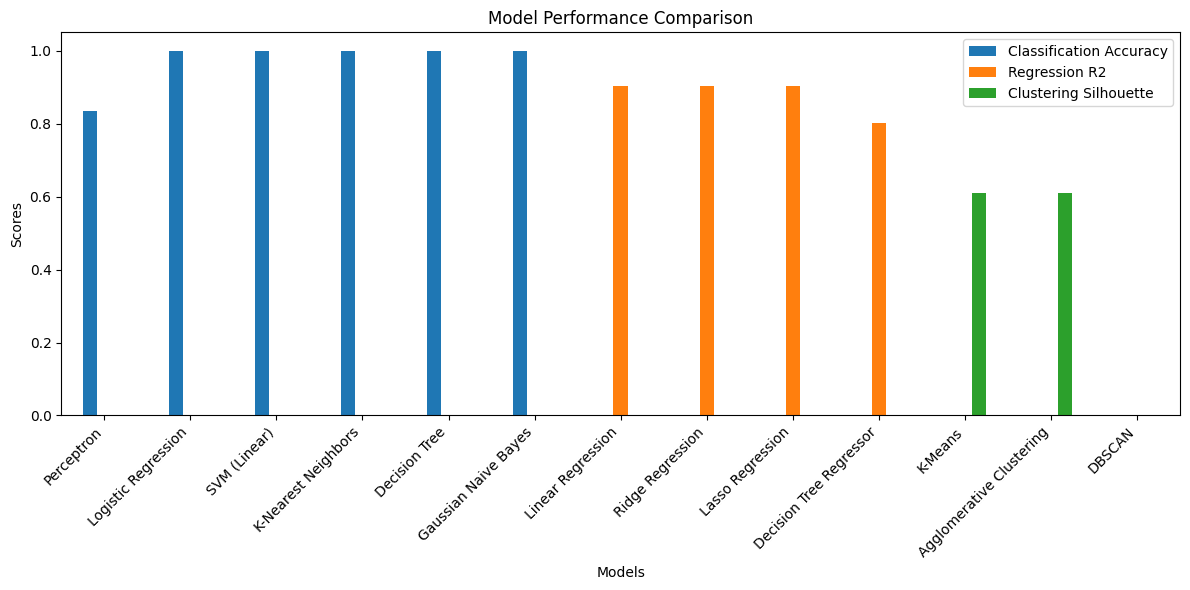

In [85]:
# Bar Plot for Comparison
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [86]:
# Show the plot
plt.show()

In [87]:
# 3. Conclusion
print("Conclusion:")
print("1. The classification models were evaluated using accuracy.")
print("2. The regression models were evaluated using R².")
print("3. The clustering models were evaluated using silhouette score.")
print("4. Based on the bar plot, the best performing models can be selected for further tuning.")

Conclusion:
1. The classification models were evaluated using accuracy.
2. The regression models were evaluated using R².
3. The clustering models were evaluated using silhouette score.
4. Based on the bar plot, the best performing models can be selected for further tuning.
